In [227]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [228]:
pokemonData = pd.read_excel("pokemon_data.xlsx")

In [229]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

In [230]:
pokemonData.shape

(800, 12)

In [231]:
pokemonData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [232]:
# For checking missing input/value in a series
pokemonData.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [233]:
pokemonData["Type 2"].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [234]:
pokemonData["Type 2"].value_counts()

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Ghost       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64

<AxesSubplot:ylabel='Legendary'>

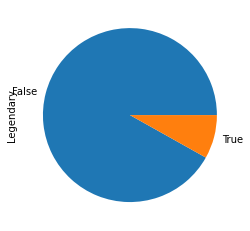

In [235]:
pokemonData["Legendary"].value_counts().plot(kind = "pie")


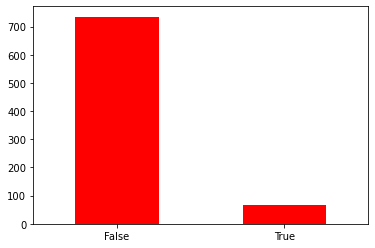

In [236]:
pokemonData["Legendary"].value_counts().plot(kind = "bar", color = "red")
plt.xticks(rotation = 0)
# plt.figure(figsize = 10, 5)

plt.show()

In [237]:
pokemonData.drop(["#", "Name"], axis = "columns", inplace = True)

In [238]:
pokemonData.head(5)

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,Poison,45,49,49,65,65,45,1,False
1,Grass,Poison,60,62,63,80,80,60,1,False
2,Grass,Poison,80,82,83,100,100,80,1,False
3,Grass,Poison,80,100,123,122,120,80,1,False
4,Fire,NaN,39,52,43,60,50,65,1,False


In [239]:
# For changing columns to float 
# astype ()
#pokemonData["Legendary"] = pokemonData["Legendary"].astype(float)

In [240]:
pokemonData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Type 1      800 non-null    object
 1   Type 2      414 non-null    object
 2   HP          800 non-null    int64 
 3   Attack      800 non-null    int64 
 4   Defense     800 non-null    int64 
 5   Sp. Atk     800 non-null    int64 
 6   Sp. Def     800 non-null    int64 
 7   Speed       800 non-null    int64 
 8   Generation  800 non-null    int64 
 9   Legendary   800 non-null    bool  
dtypes: bool(1), int64(7), object(2)
memory usage: 57.2+ KB


In [241]:
pokemonData["Legendary"] = pokemonData["Legendary"].apply(lambda x: 1 if x == "True" else 0 )

In [242]:
pokemonData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Type 1      800 non-null    object
 1   Type 2      414 non-null    object
 2   HP          800 non-null    int64 
 3   Attack      800 non-null    int64 
 4   Defense     800 non-null    int64 
 5   Sp. Atk     800 non-null    int64 
 6   Sp. Def     800 non-null    int64 
 7   Speed       800 non-null    int64 
 8   Generation  800 non-null    int64 
 9   Legendary   800 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 62.6+ KB


In [243]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(640, 9)
(640,)
(160, 9)
(160,)


In [244]:
# Importing the algorithm
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

In [245]:
#
le = LabelEncoder()
lb = LabelBinarizer()

In [246]:
# Converting Type 1 to integers using LabelEncoder
pokemonData["Type 1"] = le.fit_transform(pokemonData["Type 1"])

In [247]:
pokemonData["Type 1"].head(5)

0    9
1    9
2    9
3    9
4    6
Name: Type 1, dtype: int32

In [248]:
pokemonData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Type 1      800 non-null    int32 
 1   Type 2      414 non-null    object
 2   HP          800 non-null    int64 
 3   Attack      800 non-null    int64 
 4   Defense     800 non-null    int64 
 5   Sp. Atk     800 non-null    int64 
 6   Sp. Def     800 non-null    int64 
 7   Speed       800 non-null    int64 
 8   Generation  800 non-null    int64 
 9   Legendary   800 non-null    int64 
dtypes: int32(1), int64(8), object(1)
memory usage: 59.5+ KB


In [249]:
pokemonData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Type 1      800 non-null    int32 
 1   Type 2      414 non-null    object
 2   HP          800 non-null    int64 
 3   Attack      800 non-null    int64 
 4   Defense     800 non-null    int64 
 5   Sp. Atk     800 non-null    int64 
 6   Sp. Def     800 non-null    int64 
 7   Speed       800 non-null    int64 
 8   Generation  800 non-null    int64 
 9   Legendary   800 non-null    int64 
dtypes: int32(1), int64(8), object(1)
memory usage: 59.5+ KB


In [250]:
# Checking mode (the [0] will pick out only the "flying")
pokemonData["Type 2"].mode()[0]

'Flying'

In [251]:
# Filling in null values with the mode (Highest occuring numbers) which is FLYING OBJECT
pokemonData["Type 2"] = pokemonData["Type 2"].fillna(pokemonData["Type 2"].mode()[0])

In [252]:
pokemonData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Type 1      800 non-null    int32 
 1   Type 2      800 non-null    object
 2   HP          800 non-null    int64 
 3   Attack      800 non-null    int64 
 4   Defense     800 non-null    int64 
 5   Sp. Atk     800 non-null    int64 
 6   Sp. Def     800 non-null    int64 
 7   Speed       800 non-null    int64 
 8   Generation  800 non-null    int64 
 9   Legendary   800 non-null    int64 
dtypes: int32(1), int64(8), object(1)
memory usage: 59.5+ KB


In [253]:
# Converting TYPE 2 series to integers
pokemonData["Type 2"] = le.fit_transform(pokemonData["Type 2"])

In [254]:
pokemonData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Type 1      800 non-null    int32
 1   Type 2      800 non-null    int32
 2   HP          800 non-null    int64
 3   Attack      800 non-null    int64
 4   Defense     800 non-null    int64
 5   Sp. Atk     800 non-null    int64
 6   Sp. Def     800 non-null    int64
 7   Speed       800 non-null    int64
 8   Generation  800 non-null    int64
 9   Legendary   800 non-null    int64
dtypes: int32(2), int64(8)
memory usage: 56.4 KB


In [255]:
X = pokemonData.drop("Legendary", axis = "columns")

In [256]:
y = pokemonData["Legendary"]

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [258]:
logist = LogisticRegression()

In [259]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(640, 9)
(640,)
(160, 9)
(160,)


In [260]:
gaus = GaussianNB()

In [261]:
gaus.fit(X_train, y_train)

GaussianNB()

In [262]:
gaus.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [263]:
pred = gaus.predict(X_test)

In [264]:
accuracy_score(y_test, pred) * 100

100.0

In [265]:
rand = RandomForestClassifier()

In [266]:
rand.fit(X_train, y_train)

RandomForestClassifier()

In [267]:
rand.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [268]:
predo = rand.predict(X_test)

In [269]:
accuracy_score(y_test, predo)

1.0